In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')



In [6]:
df=pd.read_csv('stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
##X and y variables
X=df.drop(columns=['math_score'],axis=1)

In [9]:
y=df['math_score']

In [10]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [12]:
##create column transformer with 3 types of transformer
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_tranformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",num_tranformer,num_features),
    ]
)



In [13]:
x=preprocessor.fit_transform(X)

In [14]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
x.shape

(1000, 19)

In [16]:
###train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [18]:
##create an evaluate function to give all metrics after model training
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted) 
    rmse =np.sqrt(mean_squared_error(true,predicted))
    r2_square= r2_score(true,predicted)
    return mae,mse,rmse,r2_square
    

In [30]:
models= {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "Catboosting Regressor":CatBoostRegressor(),
    "AdaBoosting Regressor":AdaBoostRegressor()
 }
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(x_train,y_train)

    ##make predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    ##evaluate train and test dataset
    model_train_mae,model_train_rmse,model,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    


    print('Model Performance for training set')
    print(" - root mean squared error : {:.4f}".format(model_train_rmse))
    print(" - mean absolute error : {:.4f}".format(model_train_mae))
    print(" r2 score : {:.4f}".format(model_train_r2))

    print("--------------------------------------------------------")

    print('Model Performance for test set')
    print(" - root mean squared error : {:.4f}".format(model_test_rmse))
    print(" - mean absolute error : {:.4f}".format(model_test_mae))
    print(" r2 score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' *35)
    print('\n')
    




LinearRegression
Model Performance for training set
 - root mean squared error : 28.3633
 - mean absolute error : 4.2698
 r2 score : 0.8742
--------------------------------------------------------
Model Performance for test set
 - root mean squared error : 29.3899
 - mean absolute error : 4.2345
 r2 score : 0.8792


Ridge
Model Performance for training set
 - root mean squared error : 28.3378
 - mean absolute error : 4.2650
 r2 score : 0.8743
--------------------------------------------------------
Model Performance for test set
 - root mean squared error : 29.0563
 - mean absolute error : 4.2111
 r2 score : 0.8806


Lasso
Model Performance for training set
 - root mean squared error : 43.4784
 - mean absolute error : 5.2063
 r2 score : 0.8071
--------------------------------------------------------
Model Performance for test set
 - root mean squared error : 42.5064
 - mean absolute error : 5.1579
 r2 score : 0.8253


K-Neighbors Regressor
Model Performance for training set
 - root mea

In [33]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','r2_score']).sort_values(by=["r2_score"],ascending=False)

,Model Name,r2_score
1,Ridge,0.880593
0,LinearRegression,0.879222
5,Random Forest Regressor,0.856314
7,Catboosting Regressor,0.851632
8,AdaBoosting Regressor,0.845830
6,XGBRegressor,0.827797
2,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision tree,0.722095


In [34]:
##Linear Regression
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)


Accuracy of the model is 87.92


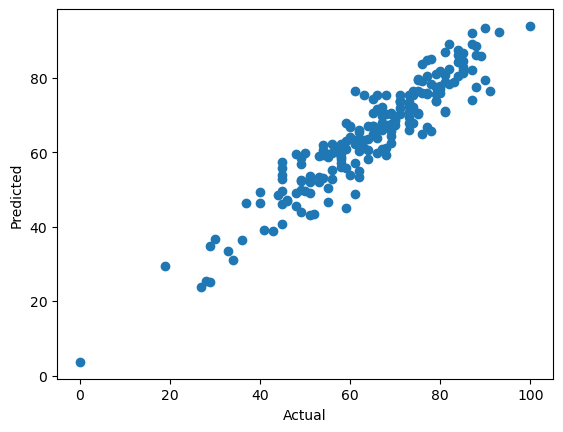

In [35]:
##plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


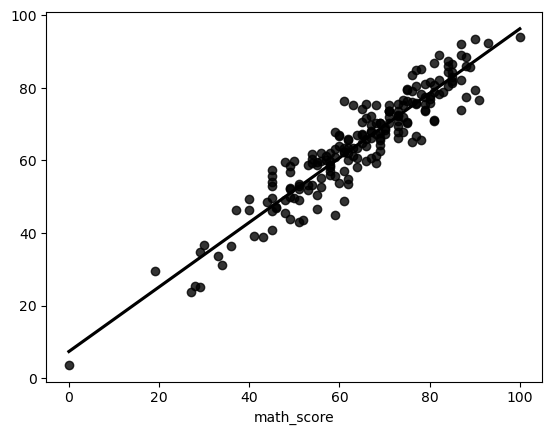

In [42]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='black')
plt.show()

In [43]:
###difference between actual and predicted values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.542969,14.457031
737,53,58.859375,-5.859375
740,80,76.929688,3.070312
660,74,76.554688,-2.554688
411,84,87.511719,-3.511719
...,...,...,...
408,52,43.464844,8.535156
332,62,62.035156,-0.035156
208,74,67.859375,6.140625
613,65,67.167969,-2.167969
